Лабораторна робота 4. Глибокий аналіз і візуалізація дани

[Посилання на GitHub](https://github.com/unIns1de/Homework-from-KSVD)

Був присутній на парі

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.

In [6]:
df = uploaded = files.upload()
df = pd.read_csv('Museum_Visitors.csv')

Saving Museum_Visitors.csv to Museum_Visitors (2).csv


In [15]:
df.head()


,Month,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum,Hellman Quon,IAMLA,Pico House,Visitor Center/ El Tranquilo Gallery,Museum of Social Justice,Biscailuz Gallery/ PK Outdoor Exhibit
0,01/01/2014 12:00:00 AM,6602,24778,1581,NaN,4486,0.0,NaN,2204.0,2961.0,NaN,NaN
1,02/01/2014 12:00:00 AM,5029,18976,1785,NaN,4172,0.0,NaN,1330.0,2276.0,NaN,NaN
2,03/01/2014 12:00:00 AM,8129,25231,3229,NaN,7082,70.0,NaN,4320.0,3116.0,NaN,NaN
3,04/01/2014 12:00:00 AM,2824,26989,2129,NaN,6756,250.0,NaN,3277.0,2808.0,NaN,NaN
4,05/01/2014 12:00:00 AM,10694,36883,3676,NaN,10858,135.0,NaN,4122.0,3987.0,NaN,NaN


2. Вивести перші 5 рядків датасету.

3. Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).

In [8]:
print("Розмір датасету:", df.shape)
print("\nТипи даних:\n", df.dtypes)
print("\nКількість пропусків:\n", df.isnull().sum())

Розмір датасету: (85, 12)

Типи даних:
 Month                                     object
America Tropical Interpretive Center       int64
Avila Adobe                                int64
Chinese American Museum                    int64
Gateway to Nature Center                 float64
Firehouse Museum                           int64
Hellman Quon                             float64
IAMLA                                    float64
Pico House                               float64
Visitor Center/ El Tranquilo Gallery     float64
Museum of Social Justice                 float64
Biscailuz Gallery/ PK Outdoor Exhibit    float64
dtype: object

Кількість пропусків:
 Month                                     0
America Tropical Interpretive Center      0
Avila Adobe                               0
Chinese American Museum                   0
Gateway to Nature Center                 53
Firehouse Museum                          0
Hellman Quon                             59
IAMLA                      

4. Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).

In [9]:
print("Кількість дублікатів:", df.duplicated().sum())
df = df.drop_duplicates()
print("Розмір після видалення дублікатів:", df.shape)

Кількість дублікатів: 0
Розмір після видалення дублікатів: (85, 12)


5. Про які роки містить інформацію датасет.

In [17]:
df['Month'] = pd.to_datetime(df['Month'])
print("Роки в датасеті:", df['Month'].dt.year.min(), "-", df['Month'].dt.year.max())

Роки в датасеті: 2014 - 2021


6. Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum,

In [21]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("\nНові назви колонок:")
print(df.columns.tolist())


Нові назви колонок:
['month', 'america_tropical_interpretive_center', 'avila_adobe', 'chinese_american_museum', 'gateway_to_nature_center', 'firehouse_museum', 'hellman_quon', 'iamla', 'pico_house', 'visitor_center/_el_tranquilo_gallery', 'museum_of_social_justice', 'biscailuz_gallery/_pk_outdoor_exhibit']


7. Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.

In [23]:
mean_visitors = df.drop(columns='month').mean()
print("Середня кількість відвідувачів:\n", mean_visitors)

Середня кількість відвідувачів:
 america_tropical_interpretive_center      5637.694118
avila_adobe                              19904.952941
chinese_american_museum                   2359.117647
gateway_to_nature_center                  1247.375000
firehouse_museum                          5286.776471
hellman_quon                               353.461538
iamla                                      882.611111
pico_house                                1329.710843
visitor_center/_el_tranquilo_gallery      2634.800000
museum_of_social_justice                  2125.972973
biscailuz_gallery/_pk_outdoor_exhibit     1088.615385
dtype: float64


8. Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік

In [24]:
df_2018 = df[df['month'].dt.year == 2018]
min_2018 = df_2018.min(numeric_only=True)
max_2018 = df_2018.max(numeric_only=True)
print("Мінімальна відвідуваність у 2018:\n", min_2018)
print("Максимальна відвідуваність у 2018:\n", max_2018)

Мінімальна відвідуваність у 2018:
 america_tropical_interpretive_center      3180.0
avila_adobe                              14718.0
chinese_american_museum                   2078.0
gateway_to_nature_center                     NaN
firehouse_museum                          3306.0
hellman_quon                                 NaN
iamla                                      965.0
pico_house                                 185.0
visitor_center/_el_tranquilo_gallery         NaN
museum_of_social_justice                  2332.0
biscailuz_gallery/_pk_outdoor_exhibit      349.0
dtype: float64
Максимальна відвідуваність у 2018:
 america_tropical_interpretive_center      5837.0
avila_adobe                              25173.0
chinese_american_museum                   4960.0
gateway_to_nature_center                     NaN
firehouse_museum                          8013.0
hellman_quon                                 NaN
iamla                                     1601.0
pico_house                      

9. Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).

In [36]:
------------

SyntaxError: invalid syntax (<ipython-input-36-e57b760c492d>, line 1)

10. Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

In [38]:
summer = [6, 7, 8]
winter = [12, 1, 2]
avila = 'avila_adobe'

summer_avg = df_2018[df_2018['month'].isin(summer)][avila].mean()
winter_avg = df_2018[df_2018['month'].isin(winter)][avila].mean()
print(f"Avila Adobe - Літо: {summer_avg}, Зима: {winter_avg}")

Avila Adobe - Літо: nan, Зима: nan


11. Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

In [41]:
df.corr()

,month,america_tropical_interpretive_center,avila_adobe,chinese_american_museum,gateway_to_nature_center,firehouse_museum,hellman_quon,iamla,pico_house,visitor_center/_el_tranquilo_gallery,museum_of_social_justice,biscailuz_gallery/_pk_outdoor_exhibit
month,1.000000,-0.781557,-0.738084,-0.315742,-0.862489,-0.371774,0.123705,-0.427023,-0.478187,-0.036228,-0.523854,0.190978
america_tropical_interpretive_center,-0.781557,1.000000,0.854877,0.540915,0.903600,0.279719,-0.064350,0.740965,0.495974,0.184422,0.687420,-0.141813
avila_adobe,-0.738084,0.854877,1.000000,0.591643,0.868099,0.415099,0.074130,0.815451,0.441115,0.161775,0.611342,-0.199426
chinese_american_museum,-0.315742,0.540915,0.591643,1.000000,0.798199,0.164809,0.093247,0.728407,0.151055,0.210557,0.610546,-0.073815
gateway_to_nature_center,-0.862489,0.903600,0.868099,0.798199,1.000000,0.823914,NaN,0.631082,0.211394,0.379469,0.589042,-0.171393
firehouse_museum,-0.371774,0.279719,0.415099,0.164809,0.823914,1.000000,0.405120,0.828048,0.153649,-0.129243,0.598201,-0.138686
hellman_quon,0.123705,-0.064350,0.074130,0.093247,NaN,0.405120,1.000000,NaN,0.235122,0.122002,NaN,NaN
iamla,-0.427023,0.740965,0.815451,0.728407,0.631082,0.828048,NaN,1.000000,0.301738,0.432899,0.705979,-0.068401
pico_house,-0.478187,0.495974,0.441115,0.151055,0.211394,0.153649,0.235122,0.301738,1.000000,0.512501,0.286410,-0.172590
visitor_center/_el_tranquilo_gallery,-0.036228,0.184422,0.161775,0.210557,0.379469,-0.129243,0.122002,0.432899,0.512501,1.000000,NaN,0.590257


# 12. Лінійний графік (відвідуваність Avila Adobe з часом)

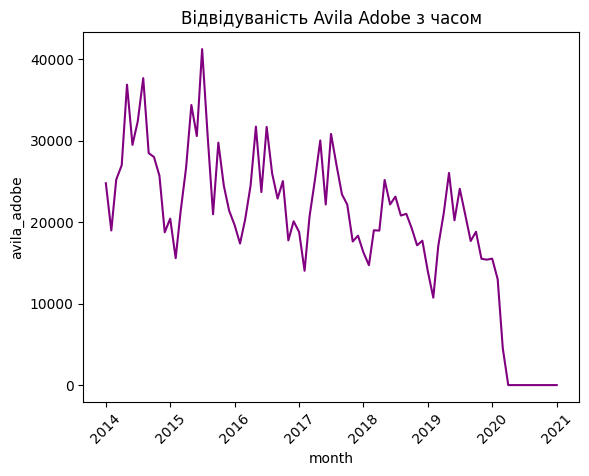

In [43]:
sns.lineplot(data=df, x='month', y='avila_adobe', color = 'purple')
plt.title('Відвідуваність Avila Adobe з часом')
plt.xticks(rotation=45)
plt.show()

13. Boxplot (розподіл відвідувачів Chinese American Museum по роках) Heatmap (кореляція між музеями)

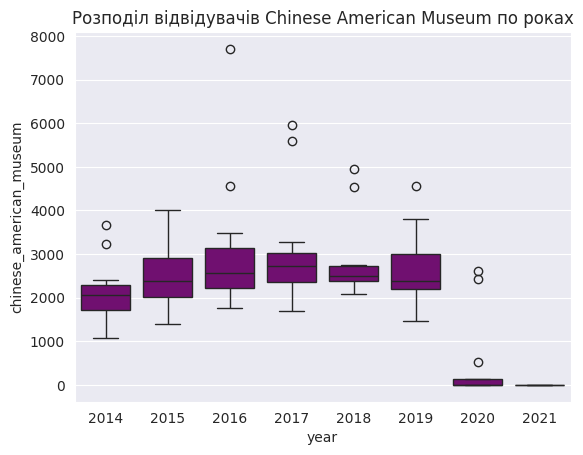

In [44]:
df['year'] = df['month'].dt.year
sns.set_style("darkgrid")
sns.boxplot(data=df, x='year', y='chinese_american_museum', color='purple')
plt.title('Розподіл відвідувачів Chinese American Museum по роках')
plt.show()

14. Histogram (розподіл кількості відвідувачів Gateway to Nature Center)

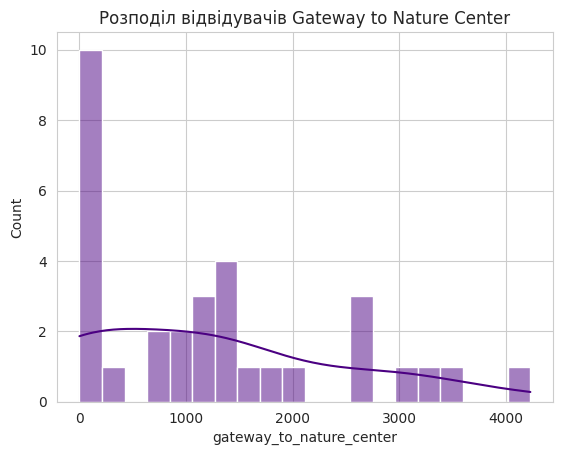

In [45]:
sns.set_style("whitegrid")
sns.histplot(data=df, x='gateway_to_nature_center', bins=20, kde=True, color = 'indigo')
plt.title('Розподіл відвідувачів Gateway to Nature Center')
plt.show()

15. Barplot (середня кількість відвідувачів по музеях за всі роки)

<ipython-input-47-3ec95fa1cc7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_visitors.values, y=avg_visitors.index, palette='RdPu')


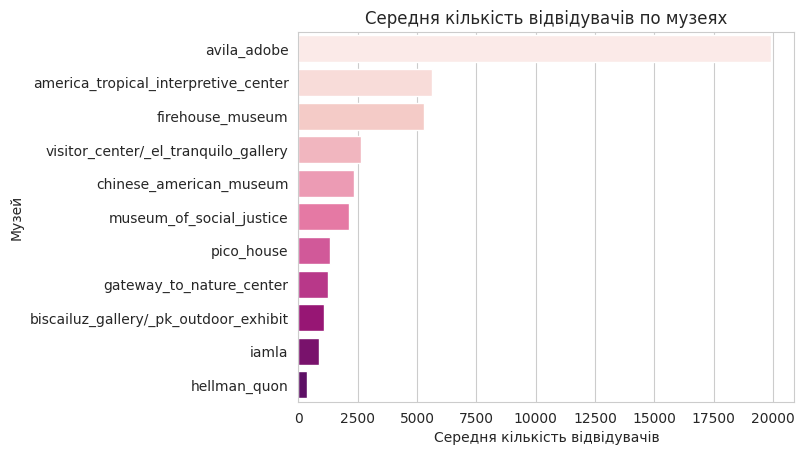

In [47]:
avg_visitors = df.drop(columns=['month', 'year']).mean().sort_values(ascending=False)
sns.barplot(x=avg_visitors.values, y=avg_visitors.index, palette='RdPu')
plt.title('Середня кількість відвідувачів по музеях')
plt.xlabel('Середня кількість відвідувачів')
plt.ylabel('Музей')
plt.show()